In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from pandas import read_csv
from pandas import DataFrame
from numpy import array
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 

In [2]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [3]:
# load dataset
dataset = read_csv('fusedData158324.csv', header=0, index_col=0)
mean_value=dataset['vehiclecount'].mean()
dataset['vehiclecount'].fillna(value=mean_value,inplace=True)
values = dataset.values

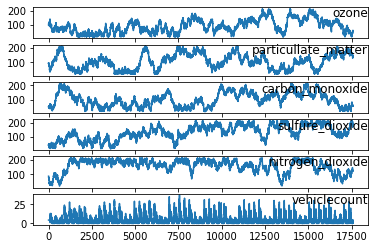

In [4]:
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5]
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [5]:
# ensure all data is float
values = values.astype('float32')

In [6]:
# choose a number of time steps
n_steps = 132

In [7]:
# convert into input/output
X, y = split_sequences(values, n_steps)
print(X.shape,y.shape)

(17437, 132, 5) (17437,)


In [8]:
# the dataset knows the number of features
n_features = X.shape[2]
n_features

5

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(13949, 132, 5) (3488, 132, 5) (13949,) (3488,)


In [10]:
# reshape x_train
n_input = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape((x_train.shape[0], n_input))
print(x_train.shape)

(13949, 660)


In [11]:
# reshape x_train
n_input = x_test.shape[1] * x_test.shape[2]
x_test = x_test.reshape((x_test.shape[0], n_input))
print(x_test.shape)

(3488, 660)


In [12]:
from sklearn.svm import SVR

# create a regressor object
svr = SVR(kernel='rbf', C=500)

In [13]:
# fit the regressor with X and Y data
svr.fit(x_train, y_train)

SVR(C=500)

In [14]:
y_pred = svr.predict(x_test)

In [15]:
from sklearn import metrics

print("RMSE = " , np.sqrt(metrics.mean_squared_error(y_test , y_pred)))
print("MAE  = " , metrics.mean_absolute_error(y_test , y_pred)) 
print("R2   = " , metrics.r2_score(y_test , y_pred))

RMSE =  2.413899203853944
MAE  =  1.6570307167430989
R2   =  0.7783238971639035


In [16]:
import pandas as pd
df1 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'variance':y_test-y_pred})
df1.head()

,Actual,Predicted,variance
0,3.0,4.574877,-1.574877
1,3.0,2.204832,0.795168
2,0.0,-1.102451,1.102451
3,5.0,5.489257,-0.489257
4,19.0,15.800397,3.199603


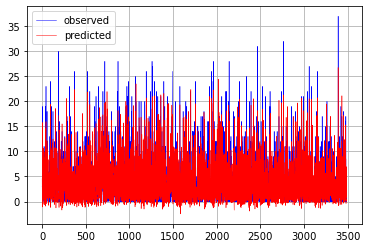

In [17]:
x_ax = range(len(x_test))
plt.plot(x_ax,y_test,lw=0.5,color='blue',label='observed')
plt.plot(x_ax,y_pred,lw=0.5,color='red',label='predicted')
plt.legend(loc='best')
plt.grid()